In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
import pandas as pd
from skimage import data, io, filters
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from helpers_functions import *
from features_extraction import *
from features_increase import *

In [2]:
# Loaded a set of images
root_dir = "training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
files = list(np.sort(files))
n = min(100, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]



n = 100 # Only use 10 images for training
files

Loading 100 images
Loading 100 images


['satImage_001.png',
 'satImage_002.png',
 'satImage_003.png',
 'satImage_004.png',
 'satImage_005.png',
 'satImage_006.png',
 'satImage_007.png',
 'satImage_008.png',
 'satImage_009.png',
 'satImage_010.png',
 'satImage_011.png',
 'satImage_012.png',
 'satImage_013.png',
 'satImage_014.png',
 'satImage_015.png',
 'satImage_016.png',
 'satImage_017.png',
 'satImage_018.png',
 'satImage_019.png',
 'satImage_020.png',
 'satImage_021.png',
 'satImage_022.png',
 'satImage_023.png',
 'satImage_024.png',
 'satImage_025.png',
 'satImage_026.png',
 'satImage_027.png',
 'satImage_028.png',
 'satImage_029.png',
 'satImage_030.png',
 'satImage_031.png',
 'satImage_032.png',
 'satImage_033.png',
 'satImage_034.png',
 'satImage_035.png',
 'satImage_036.png',
 'satImage_037.png',
 'satImage_038.png',
 'satImage_039.png',
 'satImage_040.png',
 'satImage_041.png',
 'satImage_042.png',
 'satImage_043.png',
 'satImage_044.png',
 'satImage_045.png',
 'satImage_046.png',
 'satImage_047.png',
 'satImage_04

In [27]:
patch_size=4;
gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])


Y = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

In [28]:
Y.shape

(1000000,)

# GMM

In [5]:
n_features=8;
add_RGB_features=1; # 6 features
add_grey_features=1; # 2 features 
add_RGB_spectrum_features=0; #12 features
add_grey_spectrum_features=0; # 4 features 

In [6]:
# Extract patches from input images
patch_size =4 # each patch is 16*16 pixels

img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]

# Linearize list of patches
img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])

X=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)


In [7]:
def label_to_img_GMM(imgwidth, imgheight, w, h, labels):
    im = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            im[j:j+w, i:i+h] = labels[idx]
            idx = idx + 1
    return im

In [8]:
from sklearn import mixture
w = imgs[1].shape[0]
h = imgs[1].shape[1]



gmm = mixture.GaussianMixture(n_components=10, covariance_type='full',max_iter=100000).fit(X)


Z_GMM=np.array([])
predicted_imgs=[];
img_idx = 1
for i in range(n):
    
    Xi = extract_img_features(image_dir + files[i],n_features,patch_size,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
    Zi=gmm.predict(Xi);
    Z_GMM=np.concatenate((Z_GMM, Zi), axis=0)
    predicted_im = label_to_img_GMM(w, h, patch_size, patch_size, Zi)
    predicted_imgs=np.append(predicted_imgs,predicted_im);
    
    
    
print(Z_GMM.shape)


(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 4, 4, 

(10000, 4, 4, 3)


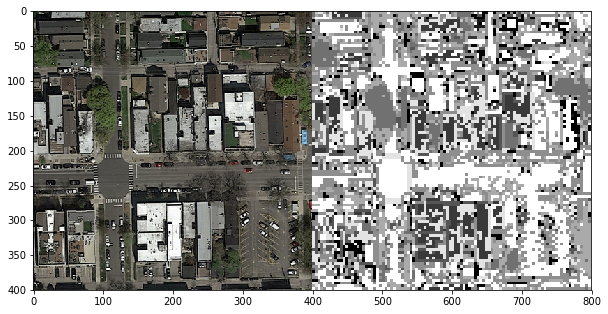

In [11]:
img_idx=34;
Xi = extract_img_features(image_dir + files[img_idx],n_features,patch_size,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
Zi=gmm.predict(Xi);
    
predicted_im = label_to_img_GMM(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg)

In [31]:
n_features=24;
add_RGB_features=1; # 6 features
add_grey_features=1; # 2 features 
add_RGB_spectrum_features=1; #12 features
add_grey_spectrum_features=1; # 4 features 



X=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
X=add_feature(X,Z_GMM)
X=add_ones(X)

(1000000, 4, 4, 2)


In [32]:
X.shape

(1000000, 26)

In [19]:
def build_k_indices(y, k_fold, seed):
    """Build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [20]:
def cross_validation_one_fold_logistic_regularized(y_cross_val_train, y_cross_val_test, tx_cross_val_train, tx_cross_val_test, \
                                 degrees, lambdas, max_iters):
    
    accuracies_train_by_deg = np.zeros([len(degrees),len(lambdas)])
    accuracies_test_by_deg = np.zeros([len(degrees),len(lambdas)])
    
    # For each degree, compute the least squares weights, the predictions and the accuracies
    previous_deg = 1
    for deg_id, deg in enumerate(degrees):
        print('++ Degree', deg, '++')
                
        # Add powers of the chosen columns
        len_data = tx_cross_val_train.shape[1]
        tx_cross_val_train = add_powers(tx_cross_val_train,deg )
        tx_cross_val_train = add_ones(tx_cross_val_train)
        tx_cross_val_test = add_powers(tx_cross_val_test,deg )
        tx_cross_val_test = add_ones(tx_cross_val_test)
        for lambda_id, single_lambda in enumerate(lambdas):
                
                print('>> Lambda', single_lambda, '<<')
                # Compute the best weights on the training set
                logreg = linear_model.LogisticRegression(C=1/single_lambda, class_weight="balanced",max_iter=max_iters)
                logreg.fit(tx_cross_val_train,y_cross_val_train )

                # Compute the predictions
                y_predicted_cross_val_train = logreg.predict(tx_cross_val_train)
                y_predicted_cross_val_test = logreg.predict(tx_cross_val_test)



                # Compute the accuracies for each degree
                accuracies_train_by_deg[deg_id,lambda_id] = \
                    np.sum(y_predicted_cross_val_train == y_cross_val_train)/len(y_cross_val_train)
                accuracies_test_by_deg[deg_id,lambda_id] = \
                    np.sum(y_predicted_cross_val_test == y_cross_val_test)/len(y_cross_val_test)


                print(accuracies_test_by_deg[deg_id,lambda_id])
        
        # Update the previous degree to the actual degree
        previous_deg = deg
        
    return accuracies_train_by_deg, accuracies_test_by_deg






In [21]:
def cross_validation_logistic_regularized(Y,X, degrees, lambdas, k_fold, seed, max_iters):
    
    # Get the indices so that we get the k'th subgroup in test, others in train, for each k
    k_indices = build_k_indices(Y, k_fold, seed)
    
    # Initialize matrix of computed accuracies for each degree and each fold
    accuracies_train_by_fold = np.zeros([len(degrees), len(lambdas), k_fold])
    accuracies_test_by_fold = np.zeros([len(degrees), len(lambdas), k_fold])

    
    for k in range(k_fold):
        print('--- Fold', k, '---')
        # Create the testing set for this fold number
        k_index = k_indices[k] # Indices of the testing set for fold k
        Y_cross_val_test = Y[k_index]
        X_cross_val_test = X[k_index,:]
        
        
        # Create the training set for this fold number
        mask = np.ones(len(Y), dtype=bool) # set all elements to True
        mask[k_index] = False # set test elements to False
        Y_cross_val_train = Y[mask] # select only True elements (ie train elements)
        X_cross_val_train = X[mask,:]
       
        # Compute the accuracies for each degree
        accuracies_train_by_fold[:,:,k], accuracies_test_by_fold[:,:,k] = cross_validation_one_fold_logistic_regularized\
            (Y_cross_val_train, Y_cross_val_test, X_cross_val_train, X_cross_val_test, \
                                 degrees, lambdas,max_iters)
    # Compute the mean accuracies over the folds, for each degree
    mean_accuracies_train_by_deg = np.mean(accuracies_train_by_fold, axis=2)
    mean_accuracies_test_by_deg = np.mean(accuracies_test_by_fold, axis=2)
    
    # Get the index of the best accuracy in the testing set
    max_id_deg_test,max_id_lambda = \
        np.unravel_index(mean_accuracies_test_by_deg.argmax(), mean_accuracies_test_by_deg.shape)
    
    # Find the optimal degree and the corresponding accuracies in the training and testing sets
    best_deg = degrees[max_id_deg_test]
    best_lambda=lambdas[max_id_lambda]
    best_accuracy_test = mean_accuracies_test_by_deg[max_id_deg_test,max_id_lambda]
    corresponding_accuracy_train = mean_accuracies_train_by_deg[max_id_deg_test,max_id_lambda]
    
    print('Best accuracy test =', best_accuracy_test, 'with degree =', best_deg , 'lambda=',best_lambda)
    print('Corresponding accuracy train =', corresponding_accuracy_train)
    
    return best_deg, best_lambda, best_accuracy_test, corresponding_accuracy_train                        



In [29]:
degrees = range(2,4)
lambdas = np.logspace(-8,-2,6)
k_fold=2
seed = 2
print(Y.shape)
max_iters = 5000
print(X.shape)
best_deg,best_lambda, best_accuracy_test, corresponding_accuracy_train = \
        cross_validation_logistic_regularized(Y, X, degrees, lambdas, k_fold, seed, max_iters)
    

(1000000,)
(1000000, 25)
--- Fold 0 ---
++ Degree 2 ++
>> Lambda 1e-08 <<
0.634156
>> Lambda 1.58489319246e-07 <<
0.624092
>> Lambda 2.51188643151e-06 <<
0.626056
>> Lambda 3.98107170553e-05 <<
0.632738
>> Lambda 0.00063095734448 <<
0.634626
>> Lambda 0.01 <<


KeyboardInterrupt: 

In [ ]:
print(X.shape)
print(best_deg)
print(best_lambda)

In [16]:
X=add_powers(X,best_deg)
X=add_feature(X,Z_GMM)
X=add_ones(X)
logreg = linear_model.LogisticRegression(C=1/best_lambda, class_weight="balanced",max_iter=100000)
logreg.fit(X, Y)

LogisticRegression(C=25118.86431509582, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

(10000, 4, 4, 3)
(10000, 4, 4, 3)
(10000, 26)
(10000,)


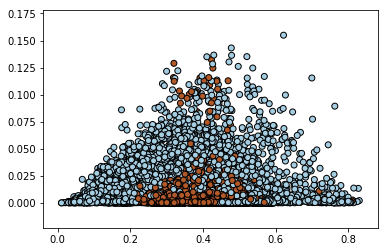

In [18]:
n_features=8;
add_RGB_features=1; # 6 features
add_grey_features=1; # 2 features 
add_RGB_spectrum_features=0; #12 features
add_grey_spectrum_features=0; # 4 features 

# we create an instance of the classifier and fit the data
img_idx = 17

Xi = extract_img_features(image_dir + files[img_idx],n_features,patch_size,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
Z_GMM=gmm.predict(Xi);

n_features=8;
add_RGB_features=1; # 6 features
add_grey_features=1; # 2 features 
add_RGB_spectrum_features=0; #12 features
add_grey_spectrum_features=0; # 4 features 

Xi = extract_img_features(image_dir + files[img_idx],n_features,patch_size,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
Xi=add_powers(Xi,best_deg)

Xi=add_feature(Xi,Z_GMM)
Xi=add_ones(Xi)
print(Xi.shape)



Zi = logreg.predict(Xi)
print(Zi.shape)
plt.scatter(Xi[:, 0], Xi[:, 3], c=Zi, edgecolors='k', cmap=plt.cm.Paired)


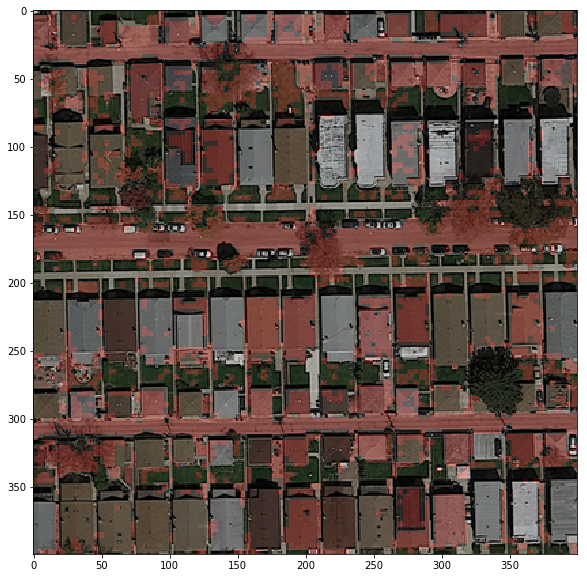

In [19]:
# Display prediction as an image
w = imgs[img_idx].shape[0]
h = imgs[img_idx].shape[1]



predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')
new_img = make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)



# Prediction on test


In [72]:
import glob

root_dir = "test_set_images/";


imgs=[];
for i in range(n-1):
    ind=i+1;
    image_dir="test_"+str(ind)+"/";
    path=root_dir+image_dir
    files = os.listdir(path)
    img = load_image(path + files[0])
    imgs.append(img)
    print(path + files[0])





test_set_images/test_1/test_1.png
test_set_images/test_2/test_2.png
test_set_images/test_3/test_3.png
test_set_images/test_4/test_4.png
test_set_images/test_5/test_5.png
test_set_images/test_6/test_6.png
test_set_images/test_7/test_7.png
test_set_images/test_8/test_8.png
test_set_images/test_9/test_9.png
test_set_images/test_10/test_10.png
test_set_images/test_11/test_11.png
test_set_images/test_12/test_12.png
test_set_images/test_13/test_13.png
test_set_images/test_14/test_14.png
test_set_images/test_15/test_15.png
test_set_images/test_16/test_16.png
test_set_images/test_17/test_17.png
test_set_images/test_18/test_18.png
test_set_images/test_19/test_19.png
test_set_images/test_20/test_20.png
test_set_images/test_21/test_21.png
test_set_images/test_22/test_22.png
test_set_images/test_23/test_23.png
test_set_images/test_24/test_24.png
test_set_images/test_25/test_25.png
test_set_images/test_26/test_26.png
test_set_images/test_27/test_27.png
test_set_images/test_28/test_28.png
test_set_i

In [73]:
import os
import sys

import math
import matplotlib.image as mpimg
import numpy as np


# Convert an array of binary labels to a uint8
def binary_to_uint8(img):
    rimg = (img * 255).round().astype(np.uint8)
    return rimg

def reconstruct_from_labels(image_id):
    im = np.zeros((imgwidth, imgheight), dtype=np.uint8)
    f = open(label_file)
    lines = f.readlines()
    image_id_str = '%.3d_' % image_id
    for i in range(1, len(lines)):
        line = lines[i]
        if not image_id_str in line:
            continue

        tokens = line.split(',')
        id = tokens[0]
        prediction = int(tokens[1])
        tokens = id.split('_')
        i = int(tokens[1])
        j = int(tokens[2])

        je = min(j+w, imgwidth)
        ie = min(i+h, imgheight)
        if prediction == 0:
            adata = np.zeros((w,h))
        else:
            adata = np.ones((w,h))

        im[j:je, i:ie] = binary_to_uint8(adata)

    Image.fromarray(im).save('prediction_' + '%.3d' % image_id + '.png')

    return im

   



array([[  3.23529422e-01,   2.99509823e-01,   2.67401993e-01, ...,
          8.53617967e-04,   0.00000000e+00,   1.00000000e+00],
       [  1.46813720e-01,   1.45588249e-01,   1.25490203e-01, ...,
          6.78007863e-03,   5.00000000e+00,   1.00000000e+00],
       [  1.86274529e-01,   1.91911772e-01,   1.68627456e-01, ...,
          8.57233815e-03,   5.00000000e+00,   1.00000000e+00],
       ..., 
       [  3.84803951e-01,   3.58823538e-01,   3.26960802e-01, ...,
          4.48904298e-02,   4.00000000e+00,   1.00000000e+00],
       [  2.98039228e-01,   2.81862736e-01,   2.63480395e-01, ...,
          2.32155304e-02,   4.00000000e+00,   1.00000000e+00],
       [  4.11274523e-01,   3.82598042e-01,   3.65686297e-01, ...,
          7.95146741e-04,   0.00000000e+00,   1.00000000e+00]])

# GMM for tests

In [89]:

Z_GMM=np.array([])
patch_size=4
print(len(imgs))
for i in range(len(imgs)):
    n_features=8;
    add_RGB_features=1; # 6 features
    add_grey_features=1; # 2 features 
    add_RGB_spectrum_features=0; #12 features
    add_grey_spectrum_features=0; # 4 features 
    img_patches = np.asarray(img_crop(imgs[i], patch_size, patch_size))
    Xi=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
    Zi_GMM=gmm.predict(Xi);
    n_features=24;
    add_RGB_features=1; # 6 features
    add_grey_features=1; # 2 features 
    add_RGB_spectrum_features=1; #12 features
    add_grey_spectrum_features=1; # 4 features 
    Xi=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
    Xi=add_feature(X,Zi_GMM)
    Xi=add_ones(Xi)
    Zi = logreg.predict(Xi)
    predicted_im = label_to_img(w, h, patch_size, patch_size, Zi);
    ind=i+1;
    predicted_im =binary_to_uint8(predicted_im )
    Image.fromarray(predicted_im).save('prediction_' + '%.3d' % ind + '.png')
    

50
(23104, 4, 4, 2)
(23104, 4, 4, 2)
(23104, 4, 4, 2)
(23104, 4, 4, 2)


KeyboardInterrupt: 

In [78]:
Z_GMM.shape

(1155200,)

In [ ]:
img_idx = 15
print(len(imgs))

for i in range(len(imgs)):
    w = imgs[i].shape[0]
    h = imgs[i].shape[1]
    img_patches = np.asarray(img_crop(imgs[i], patch_size, patch_size))
    Xi=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)    Xi=add_feature(Xi,Z_GMM)
    Xi=add_powers(Xi,best_deg)
    Xi=add_ones(Xi)
    Zi = logreg.predict(Xi)
    predicted_im = label_to_img(w, h, patch_size, patch_size, Zi);
    ind=i+1;
    predicted_im =binary_to_uint8(predicted_im )
    Image.fromarray(predicted_im).save('prediction_' + '%.3d' % ind + '.png')

In [ ]:
from mask_to_submission import *

image_filenames=glob.glob('*.png')
print(image_filenames)
submission_filename='sample_submission.csv'
masks_to_submission(submission_filename, *image_filenames)

# Test di image Processing


In [86]:
n_features=24;
add_RGB_features=1; # 6 features
add_grey_features=1; # 2 features 
add_RGB_spectrum_features=1; #12 features
add_grey_spectrum_features=1; # 4 features 
print(len(imgs))
img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(len(imgs))]

img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])

print(len(img_patches))

X=extract_new_features(img_patches,n_features,add_RGB_features,add_grey_features,add_RGB_spectrum_features,add_grey_spectrum_features)
X=add_feature(X,Z_GMM)

50
1155200


KeyboardInterrupt: 

In [ ]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt


img = RGB_to_grey(imgs[1]);
descs, descs_img = daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [ ]:
        # filters for averaging  
        import cv2
        import numpy as np
        from matplotlib import pyplot as plt

        img = cv2.imread('satImage_001.png')

        kernel = np.ones((9,9),np.float32)/81
        dst = cv2.filter2D(img,-1,kernel)

        plt.subplot(121),plt.imshow(img),plt.title('Original')
        plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
        plt.xticks([]), plt.yticks([])
        plt.show()

In [ ]:
# template 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread(image_dir+'satImage_001.png')


kernel = np.ones((9,9),np.float32)/81
img_rgb = cv2.filter2D(img_rgb,-1,kernel)


img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


template = cv2.imread('albero2.png',0);


template = cv2.filter2D(template,-1,kernel)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

In [ ]:
# contour
# try contour with skimage
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

image=RGB_to_grey(imgs[12]);
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(image, 0.3)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
# spectrum __ seem to be not so informative

import cv2
import numpy as np
from matplotlib import pyplot as plt

img=img_patches[3456];
f = np.fft.fft2(img)

fshift = f
print(fshift.shape)
magnitude_spectrum = np.angle(fshift)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# try hough with skimage
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

image_num=1



# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255
image = RGB_to_grey(imgs[image_num]) 

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6),
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
#image = data.camera()
image = RGB_to_grey(imgs[image_num]) 
edges = canny(image, 1, 2, 1000)
edges = canny(image, sigma=1.5, low_threshold=0.3, high_threshold=0.5, mask=None, use_quantiles=False)
#edges = feature.canny(image,sigma=1.5)

lines = probabilistic_hough_line(edges, threshold=20, line_length=4,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

edges 
ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()